In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from config import api_key
import time

In [14]:
#2019 Happiness dataframe
Happy_df_2019 = pd.read_csv("Resources/2019_Clean.csv")

#2020 Happiness dataframe
Happy_df_2020 = pd.read_csv("Resources/2020_Clean.csv")

#Merging all data sets together

Merge1920_df = pd.merge(Happy_df_2019,Happy_df_2020, on ="country")

#Merge_df = pd.merge(Merge1518_df,Merge1920_df, on ="country")

happiness_report = Merge1920_df
happiness_report

,country,happiness_score_2019,GDP_per_capita_2019,social_support_2019,life_expectancy_2019,freedom_2019,generosity_2019,corruption_2019,happiness_score_2020,GDP_per_capita_2020,social_support_2020,life_expectancy_2020,freedom_2020,generosity_2020,corruption_2020
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
143,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881
144,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2.5669,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226
145,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265


In [15]:
Merge_grt_df = happiness_report[happiness_report.happiness_score_2019 > 5]
Merge_less_df = happiness_report[happiness_report.happiness_score_2019 < 5]


The correlation between GDP and Happiness Score for countries with a Happiness score of >5 in 2019 is 0.64
The correlation between GDP and Happiness Score for countries with a Happiness score of >5 in 2020 is 0.63


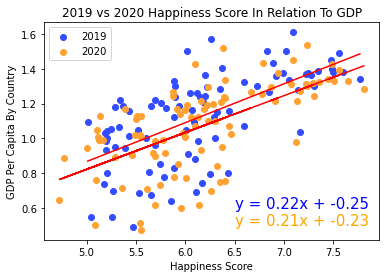

<ipython-input-19-edecdb9ce9a7>:40: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(Merge_less_df["happiness_score_2020"], Merge_less_df["GDP_per_capita_2020"], Label = "2020", c = "#FFA233")


The correlation between GDP and Happiness Score for countries with a Happiness score of <5 in 2019 is 0.41
The correlation between GDP and Happiness Score for countries with a Happiness score of <5 in 2020 is 0.29


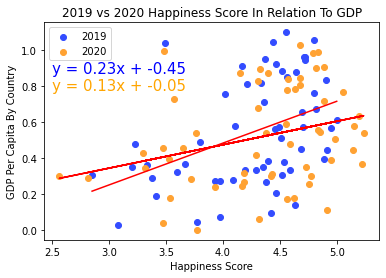

In [19]:
#2019 GDP data for countries with a happiness score of 5 or greater
plt.scatter(Merge_grt_df["happiness_score_2019"], Merge_grt_df["GDP_per_capita_2019"], label = "2019", c = "#334CFF")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Merge_grt_df["happiness_score_2019"],Merge_grt_df["GDP_per_capita_2019"])
regress_values = Merge_grt_df["happiness_score_2019"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Merge_grt_df["happiness_score_2019"],regress_values,"r-")
plt.annotate(line_eq,(6.5,0.6),fontsize=15,color="blue")

#2020 GDP data for countries with a happiness score of 5 or greater
plt.scatter(Merge_grt_df["happiness_score_2020"], Merge_grt_df["GDP_per_capita_2020"], label = "2020", c = "#FFA233")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Merge_grt_df["happiness_score_2020"],Merge_grt_df["GDP_per_capita_2020"])
regress_values = Merge_grt_df["happiness_score_2020"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Merge_grt_df["happiness_score_2020"],regress_values,"r-")
plt.annotate(line_eq,(6.5,0.5),fontsize=15,color="orange")
plt.xlabel("Happiness Score")
plt.ylabel("GDP Per Capita By Country")
plt.title("2019 vs 2020 Happiness Score In Relation To GDP")
plt.legend()
plt.savefig('Grt_GDP.png')

#correlation
correlation_Grt_2019 = st.pearsonr(Merge_grt_df["happiness_score_2019"], Merge_grt_df["GDP_per_capita_2019"])
print(f"The correlation between GDP and Happiness Score for countries with a Happiness score of >5 in 2019 is {round(correlation_Grt_2019[0],2)}")
correlation_Grt_2020 = st.pearsonr(Merge_grt_df["happiness_score_2020"], Merge_grt_df["GDP_per_capita_2020"])
print(f"The correlation between GDP and Happiness Score for countries with a Happiness score of >5 in 2020 is {round(correlation_Grt_2020[0],2)}")
plt.show()



#2019 GDP data for countries with a happiness score of 5 or less
plt.scatter(Merge_less_df["happiness_score_2019"], Merge_less_df["GDP_per_capita_2019"], label = "2019", c = "#334CFF")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Merge_less_df["happiness_score_2019"],Merge_less_df["GDP_per_capita_2019"])
regress_values = Merge_less_df["happiness_score_2019"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Merge_less_df["happiness_score_2019"],regress_values,"r-")
plt.annotate(line_eq,(2.5,0.87),fontsize=15,color="blue")

#2020 GDP data for countries with a happiness score of 5 or less
plt.scatter(Merge_less_df["happiness_score_2020"], Merge_less_df["GDP_per_capita_2020"], Label = "2020", c = "#FFA233")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Merge_less_df["happiness_score_2020"],Merge_less_df["GDP_per_capita_2020"])
regress_values = Merge_less_df["happiness_score_2020"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Merge_less_df["happiness_score_2020"],regress_values,"r-")
plt.annotate(line_eq,(2.5,0.78),fontsize=15,color="orange")

#making graph based on data
plt.xlabel("Happiness Score")
plt.ylabel("GDP Per Capita By Country")
plt.title("2019 vs 2020 Happiness Score In Relation To GDP")
plt.legend()
plt.savefig('Less_GDP.png')

#correlation
correlation_less_2019 = st.pearsonr(Merge_less_df["happiness_score_2019"], Merge_less_df["GDP_per_capita_2019"])
print(f"The correlation between GDP and Happiness Score for countries with a Happiness score of <5 in 2019 is {round(correlation_less_2019[0],2)}")
correlation_less_2020 = st.pearsonr(Merge_less_df["happiness_score_2020"], Merge_less_df["GDP_per_capita_2020"])
print(f"The correlation between GDP and Happiness Score for countries with a Happiness score of <5 in 2020 is {round(correlation_less_2020[0],2)}")
plt.show()
